In [2]:
import pandas as pd
df_bank = pd.read_csv('bank-full.csv', sep=';')

In [4]:
print(df_bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
print(df_bank.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
print(df_bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [7]:
statistics_columns = df_bank.select_dtypes(include=['int64']).columns

statistics = df_bank[statistics_columns].describe()

print(statistics)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [8]:
grouping = df_bank.groupby(['job', 'marital'])


print(grouping['balance'].mean())

job            marital 
admin.         divorced     878.333333
               married     1281.409580
               single      1020.739005
blue-collar    divorced     820.806667
               married     1113.165901
               single      1056.105263
entrepreneur   divorced    1155.983240
               married     1643.387850
               single      1248.235294
housemaid      divorced    1573.222826
               married     1248.173246
               single      2074.743056
management     divorced    1618.073807
               married     1828.159444
               single      1700.219545
retired        divorced    1507.835294
               married     2140.098787
               single      1360.388889
self-employed  divorced    2426.350000
               married     1644.948640
               single      1410.365471
services       divorced     834.304189
               married     1088.847528
               single       887.324708
student        divorced    1101.000000
 

Text(0.5, 1.0, 'Average Balance By Job Type')

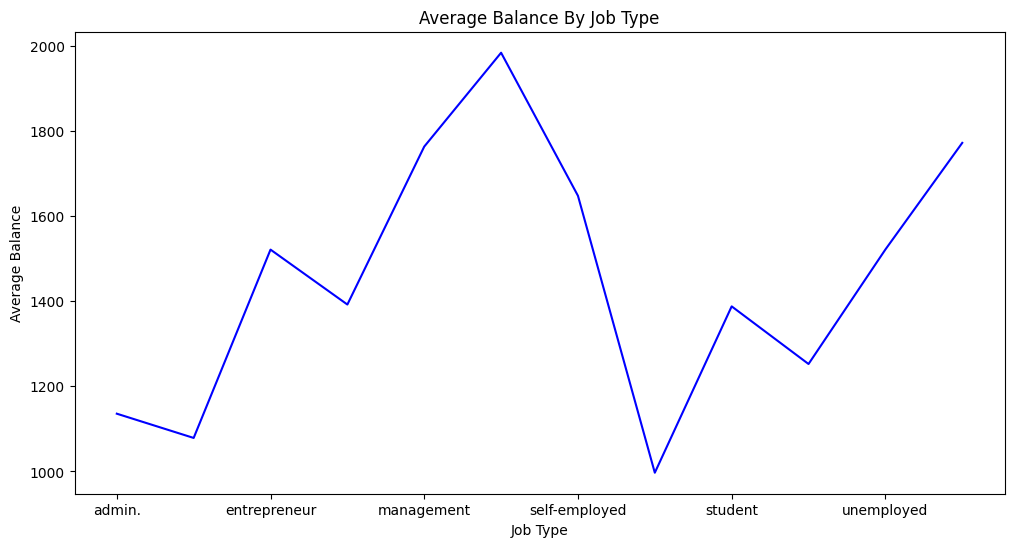

In [9]:
import matplotlib.pyplot as plt

group2 = df_bank.groupby('job')['balance'].mean()


plt.figure(figsize=(12, 6))
group2.plot(kind='line', color='blue')


plt.xlabel('Job Type')
plt.ylabel('Average Balance')
plt.title('Average Balance By Job Type')

Text(0.5, 1.0, 'Average Balance Based on Education Level')

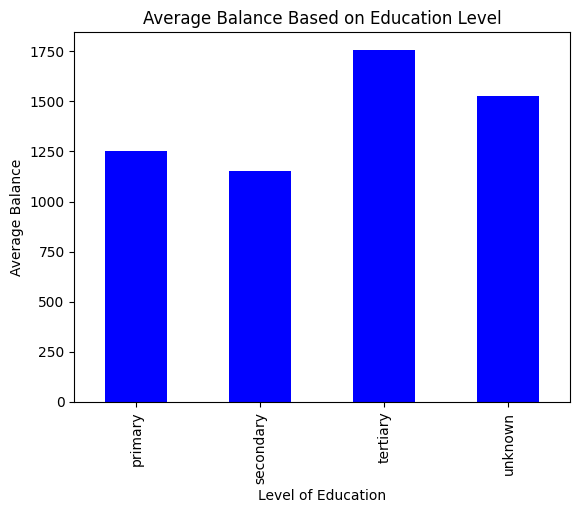

In [10]:
group3 = df_bank.groupby('education')['balance'].mean()

group3.plot(kind='bar', color='blue')

plt.xlabel('Level of Education')
plt.ylabel('Average Balance')

plt.title('Average Balance Based on Education Level')

Text(0.5, 1.0, 'Freuency of Average Duration By Job')

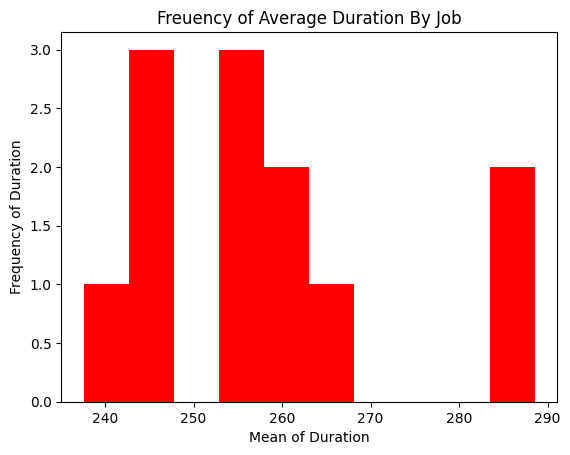

In [11]:
group4 = df_bank.groupby('job')['duration'].mean()

group4.plot(kind = 'hist', color = 'red')

plt.xlabel('Mean of Duration')
plt.ylabel('Frequency of Duration')
plt.title('Freuency of Average Duration By Job')

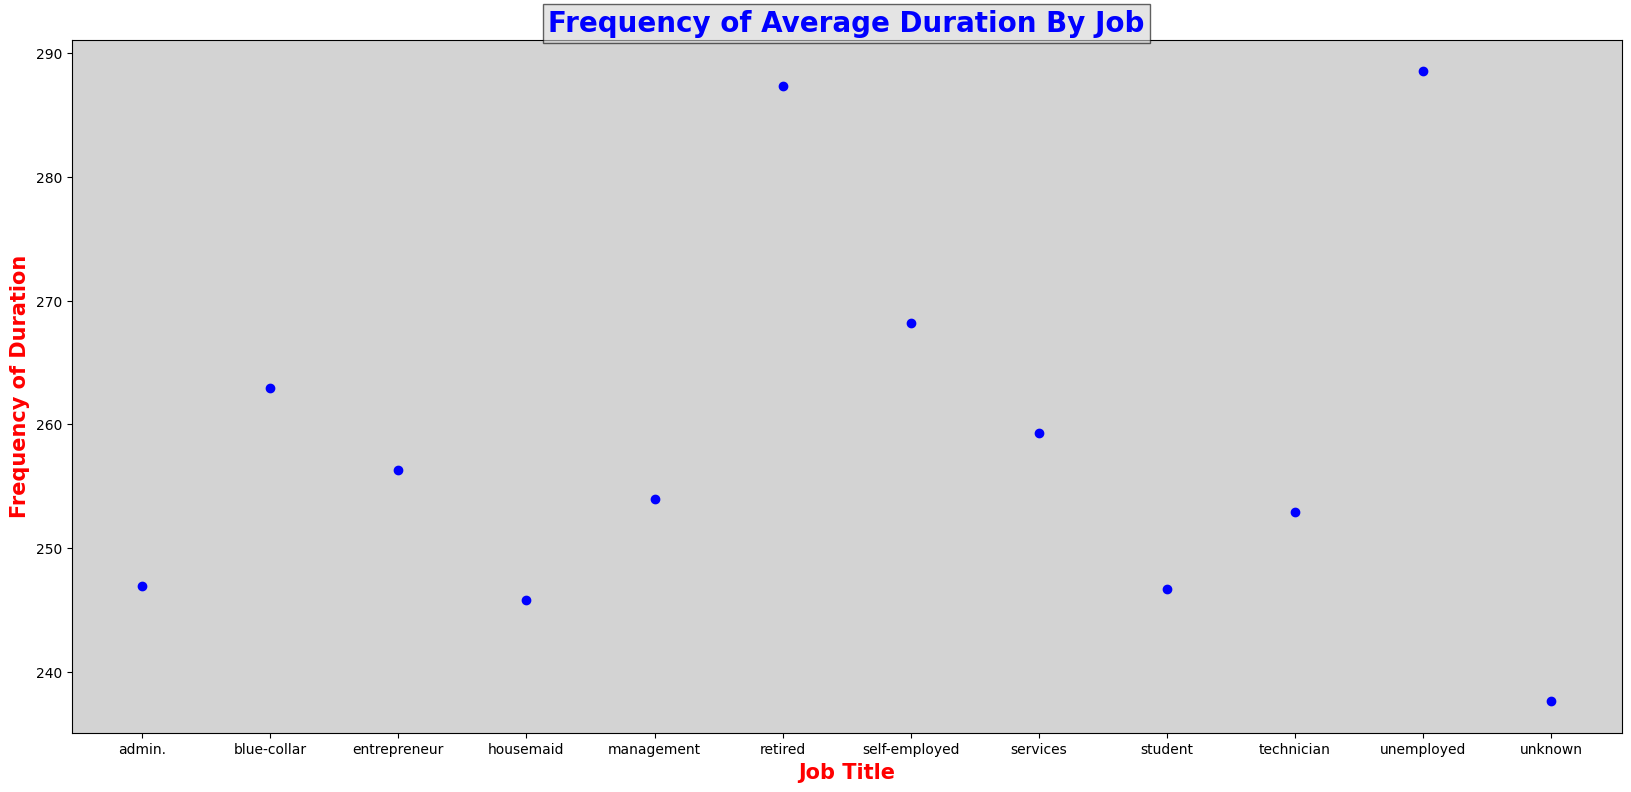

In [12]:
group5 = df_bank.groupby('job')['duration'].mean()

group5 = group5.reset_index()

# Plot the scatter plot
plt.figure(figsize=(20, 9))
plt.scatter(group5['job'], group5['duration'], color='blue')

plt.xlabel('Job Title', color='red', fontsize=15,fontweight='bold')
plt.ylabel('Frequency of Duration', color='red', fontsize=15,fontweight='bold')
plt.title('Frequency of Average Duration By Job', color='blue', fontsize=20,fontweight='bold', bbox={'facecolor': 'lightgrey', 'alpha':0.6})

plt.gca().set_facecolor('lightgray')

Text(0.5, 1.0, 'Freuency of Average Duration By Job')

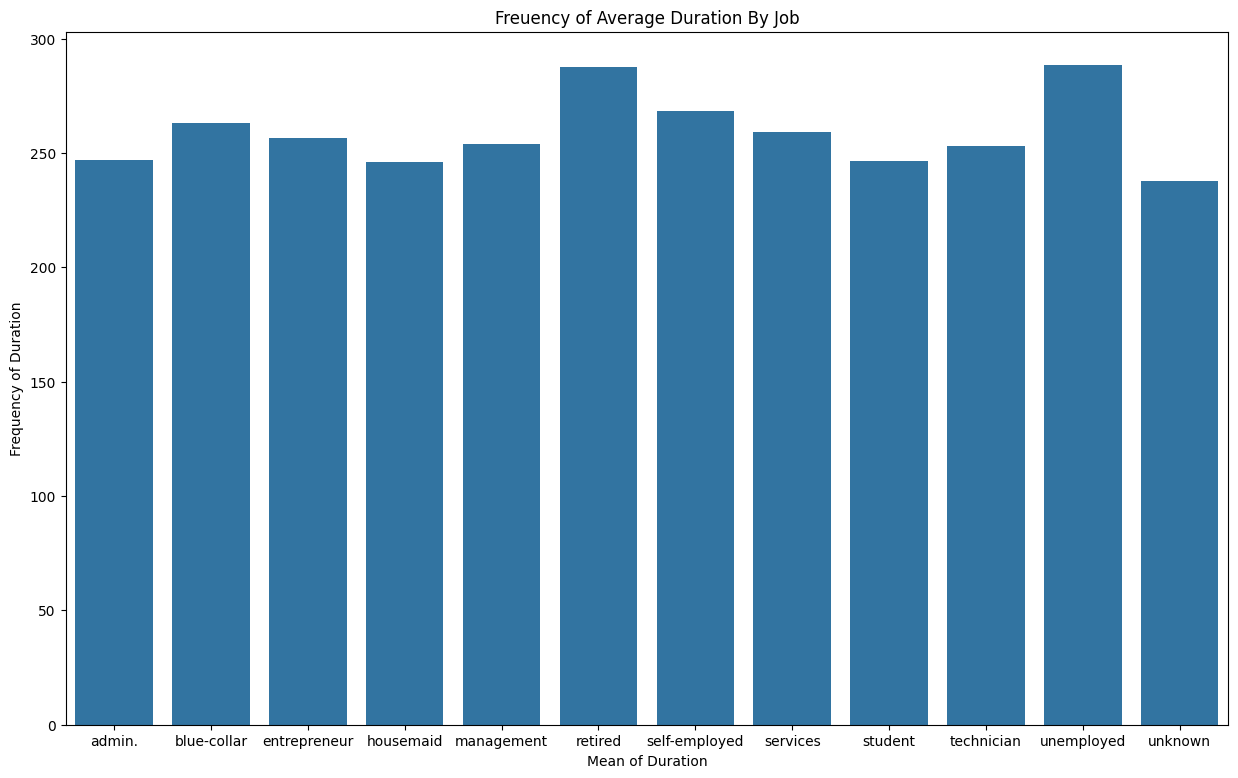

In [14]:
import seaborn as sns

group6 = df_bank.groupby('job')['duration'].mean()

# group6.plot(kind = 'hist', color = 'red')
plt.figure(figsize=(15, 9))
sns.barplot(x=group6.index, y=group6.values)

plt.xlabel('Mean of Duration')
plt.ylabel('Frequency of Duration')
plt.title('Freuency of Average Duration By Job')